## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-09-05 11:05:44,156: Qubit 0 adicionado à memória do Host 0.
2024-09-05 11:05:44,156: Qubit 0 criado com fidelidade inicial 0.46864902516870666 e adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 1 adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 1 criado com fidelidade inicial 0.6213848367699315 e adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 2 adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 2 criado com fidelidade inicial 0.8886199797487632 e adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 3 adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 3 criado com fidelidade inicial 0.5217109457984702 e adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 4 adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 4 criado com fidelidade inicial 0.5941538242702579 e adicionado à memória do Host 0.
2024-09-05 11:05:44,159: Qubit 5 adicionado à memória do Host 0.
2024-09-05 11:05:44,167: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


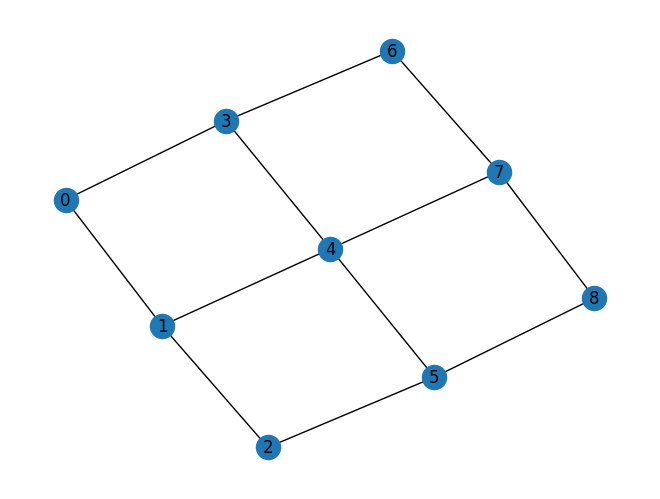

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-09-05 11:05:45,165: Qubit 1 adicionado à memória do Host 1.
2024-09-05 11:05:45,165: Qubit 2 adicionado à memória do Host 2.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000024EDE4560D0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE4561D0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE456D10>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE457110>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDD961010>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE456C10>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE457E10>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDD942CD0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE458DD0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE4573D0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EED55FDD0>]
[<quantumnet.objects.qubit.Qubit object at 0x0000024EDD943010>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE45A1D0>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE459890>, <quantumnet.objects.qubit.Qubit object at 0x0000024EDE4596D0>, <quantumnet.objects.qubit.Qubit object at 0x0000024ED

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()


##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-09-05 11:05:45,190: A fidelidade entre o qubit Qubit 1 with state 0 e o qubit Qubit 2 with state 0 é 0.489968615053279


0.489968615053279

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-09-05 11:05:45,204: A fidelidade do qubit Qubit 1 with state 0 é 0.6515594928031153


0.6515594928031153

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-05 11:05:45,219: Timeslot 1: Par epr criado com fidelidade 0.16613322046360854
2024-09-05 11:05:45,219: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [10]:
rede.physical.echp_on_demand(2,5)

2024-09-05 11:05:45,231: A fidelidade do qubit Qubit 29 with state 0 é 0.6893711726748502
2024-09-05 11:05:45,231: A fidelidade do qubit Qubit 59 with state 0 é 0.8231710489588067
2024-09-05 11:05:45,231: Timeslot 3: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_replay(2,5)

2024-09-05 11:05:45,247: A fidelidade do qubit Qubit 28 with state 0 é 0.11215448209078394
2024-09-05 11:05:45,249: A fidelidade do qubit Qubit 58 with state 0 é 0.6960471494062431
2024-09-05 11:05:45,249: Timeslot 4: A probabilidade de sucesso do ECHP falhou.


False

In [12]:
rede.get_total_useds_eprs()

2024-09-05 11:05:45,269: Eprs usados na camada PhysicalLayer: 1
2024-09-05 11:05:45,269: Eprs usados na camada LinkLayer: 0
2024-09-05 11:05:45,271: Eprs usados na camada NetworkLayer: 0


1

In [13]:
rede.get_total_useds_qubits()

2024-09-05 11:05:45,324: Qubits usados na camada PhysicalLayer: 6


6

##### Acessando o canal que mostra as probablidades e os pares eprs


In [14]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.4706873986587901,
 'prob_replay_epr_create': 0.5828743785396703,
 'eprs': [<quantumnet.objects.epr.Epr at 0x24ede45f510>,
  <quantumnet.objects.epr.Epr at 0x24ede469bd0>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [15]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x24ede474310>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x24ede45f590>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x24ede46e650>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x24ede46f510>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x24ede45f510>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x24ede45bf10>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x24ede455e10>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x24ede45b310>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x24ede474910>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x24ede46be50>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x24ede45a5d0>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x24ede46a890>,
  <quantumnet.objects.epr.Epr at 0x24ede462ad0>]}

In [16]:
rede.get_total_timeslot()

2024-09-05 11:05:45,393: Timeslot atual na camada PhysicalLayer: 4
2024-09-05 11:05:45,393: Timeslot atual na camada LinkLayer: 0
2024-09-05 11:05:45,393: Timeslot atual na camada NetworkLayer: 0
2024-09-05 11:05:45,393: Timeslot atual na camada TransportLayer: 0


4